In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.linear_model import LinearRegression
#from pandas.core import datetools

from statsmodels.tools.eval_measures import rmse

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import datasets, linear_model

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)


In [3]:
# Reading Data
data = pd.read_csv(r'E:\Python\Machine Learning\datasets\headsize.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [6]:
X

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
       3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
       3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
       4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
       3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
       3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
       3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
       3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
       3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
       3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
       3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
       4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
       4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
       3438, 3903, 3899, 3401, 3267, 3451, 3090, 34

In [7]:
Y

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375, 1340,
       1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400, 1357, 1287,
       1275, 1270, 1635, 1505, 1490, 1485, 1310, 1420, 1318, 1432, 1364,
       1405, 1432, 1207, 1375, 1350, 1236, 1250, 1350, 1320, 1525, 1570,
       1340, 1422, 1506, 1215, 1311, 1300, 1224, 1350, 1335, 1390, 1400,
       1225, 1310, 1560, 1330, 1222, 1415, 1175, 1330, 1485, 1470, 1135,
       1310, 1154, 1510, 1415, 1468, 1390, 1380, 1432, 1240, 1195, 1225,
       1188, 1252, 1315, 1245, 1430, 1279, 1245, 1309, 1412, 1120, 1220,
       1280, 1440, 1370, 1192, 1230, 1346, 1290, 1165, 1240, 1132, 1242,
       1270, 1218, 1430, 1588, 1320, 1290, 1260, 1425, 1226, 1360, 1620,
       1310, 1250, 1295, 1290, 1290, 1275, 1250, 1270, 1362, 1300, 1173,
       1256, 1440, 1180, 1306, 1350, 1125, 1165, 1312, 1300, 1270, 1335,
       1450, 1310, 1027, 1235, 1260, 1165, 1080, 1127, 1270, 1252, 1200,
       1290, 1334, 1380, 1140, 1243, 1340, 1168, 13

In [8]:
# Calculating coefficient

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [24]:
mean_x

3633.9915611814345

In [13]:
# Total number of values
n = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


There we have our coefficients.

Brain Weight = 325.573421049 + 0.263429339489 * Head Size

That is our linear model.

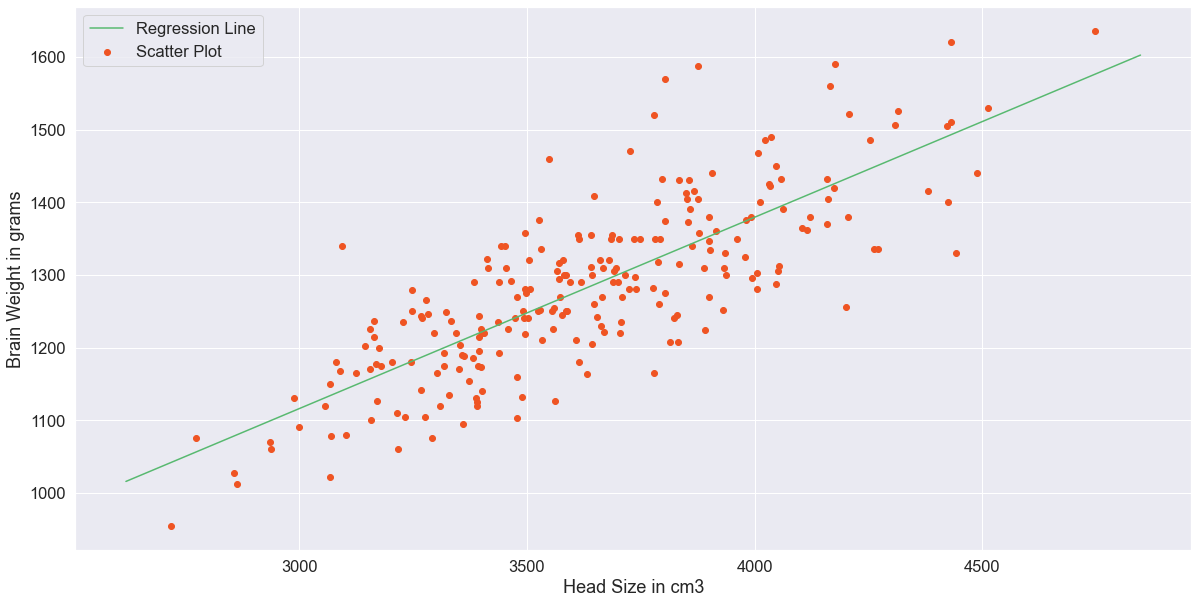

In [14]:
# Plotting Values and Regression Line

#max_x = np.max(X) + 100
#min_x = np.min(X) - 100

# Calculating line values x and y
#x = np.linspace(min_x, max_x, 1000)
#y = b0 + b1 *x

# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

# Ploting Line
# plt.plot(x, y, color='#58b970', label='Regression Line')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [27]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213783709


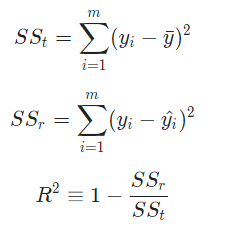

$SS_t	  is the total sum of squares  
$SS_r	  is the total sum of squares of residuals.

$R^2$       Score usually range from 0 to 1

In [19]:
# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print(r2)

[0.63931172]


In [20]:
# Validation using Scikit Learn

In [21]:
X = X.reshape((n, 1))
reg = LinearRegression()
reg = reg.fit(X, Y)

In [22]:
Y_pred = b0 + b1 * X

mse = mean_squared_error(Y, Y_pred)
r2_score = reg.score(X, Y)

In [23]:
print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957
